# Apply Linear rigression to predict sales prices of Houses

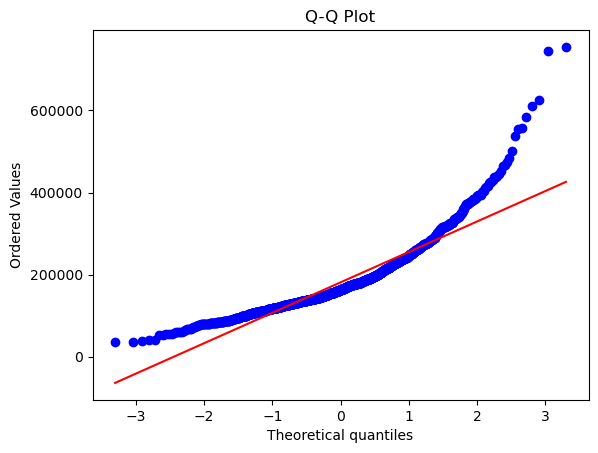

In [1]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

# Import Housing dataset
Housing = pd.read_csv('Housing.csv')
Housing = Housing.drop(Housing.columns[0], axis=1) #drop the index column
#print(Housing.head())

#Determine graphically whether the target variable SalePrice exhibits a Gaussian distribution by using a Q-Q plot.
stats.probplot(Housing['SalePrice'], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

## Since it does not follow a Gaussian distribution apply the Logarithm.

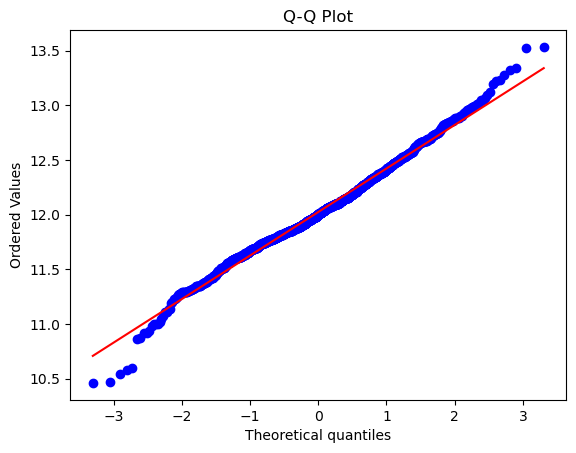

In [2]:

Housing['log_transformed'] = np.log(Housing['SalePrice'] + 1) # Plus 1 to avoid log(0)

stats.probplot(Housing['log_transformed'], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()


## One can see that it now follows a Gauss distribution.

In [3]:
# Replace NaN values by the mean of the column (for numerical columns) and the mode of the column (for categorical columns).
Housing.fillna(Housing.select_dtypes(include=['number']).mean(), inplace=True)

for col in Housing.select_dtypes(include=['object']).columns:
    Housing[col].fillna(Housing[col].mode()[0], inplace=True)

# Perform a one-hot encoding for the categorical variables.
Housing = pd.get_dummies(Housing, drop_first=False) 

# Create a second pandas DataFrame from Housing without the categorical variables.
Housing2 = Housing.select_dtypes(include=['number'])

## Perform a linear rigression on the full Housing set

In [4]:
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Perform a 70/30 Train Test Split on Housing2.
X_2 = Housing2.drop('SalePrice', axis=1)
X_2 = X_2.drop('log_transformed', axis=1)  
y_2 = Housing2['log_transformed']   

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.3, random_state=42)

# Fit a linear regression model
model_2 = LinearRegression()
model_2.fit(X_2_train, y_2_train) 

# Output a table with the name of each feature and the associated regression coefficient. 
coefficients = model_2.coef_  
features = X_2.columns

coeff_features_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients}).transpose()
coeff_features_df

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
Feature,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Coefficient,-0.000834,-0.000499,0.000002,0.087755,0.04226,0.003032,0.001313,-0.000032,0.000018,0.000008,...,0.00003,0.000114,-0.000086,0.000189,0.000302,0.000365,-0.000459,-0.000015,0.002086,-0.003703


In [5]:
y_2_train_pred = model_2.predict(X_2_train)  # In-sample predictions
y_2_test_pred = model_2.predict(X_2_test)    # Out-of-sample predictions

#In sample MSE and R^2
mse_2_train = mean_squared_error(y_2_train, y_2_train_pred)
r2_2_train = r2_score(y_2_train, y_2_train_pred)

# Out of sample MSE and R^2
mse_2_test = mean_squared_error(y_2_test, y_2_test_pred)
r2_2_test = r2_score(y_2_test, y_2_test_pred)

print(f"In-Sample (Training) MSE: {mse_2_train}")
print(f"In-Sample (Training) R^2: {r2_2_train}")
print(f"Out-of-Sample (Test) MSE: {mse_2_test}")
print(f"Out-of-Sample (Test) R^2: {r2_2_test}")

In-Sample (Training) MSE: 0.021261962733166915
In-Sample (Training) R^2: 0.8628292699057787
Out-of-Sample (Test) MSE: 0.02217139356240075
Out-of-Sample (Test) R^2: 0.8693063050982707


## Interpretation of the values
A MSE of 0.021 and R^2=0.86 in sample suggest that the model performs well on training and does not underfit. Furthermore, the MSE and R^2 don't change out of sample suggesting that the model generalizes well to unseen data and hence does not overfit.

## Train a Linear Rigression on the full Housing dataframe



In [6]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score, RepeatedKFold, KFold

# Consider the full Housing DataFrame with the categorical variables. 
X_1 = Housing.drop('SalePrice', axis=1)
X_1 = X_1.drop('log_transformed', axis=1)
y_1 = Housing['log_transformed']

# Perform a 70/30 Train Test Split on Housing.
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=42)

# Fit a linear regression model on the full Housing DataFrame.
model_1 = LinearRegression()
model_1.fit(X_1_train, y_1_train)

# Calculate the in-sample and out-of-sample predictions
y_1_train_pred = model_1.predict(X_1_train)
y_1_test_pred = model_1.predict(X_1_test)

# Calculate the in-sample and out-of-sample MSE and R^2.
mse_1_train = mean_squared_error(y_1_train, y_1_train_pred)
r2_1_train = r2_score(y_1_train, y_1_train_pred)

mse_1_test = mean_squared_error(y_1_test, y_1_test_pred)
r2_1_test = r2_score(y_1_test, y_1_test_pred)

print(f"In-Sample (Training) MSE: {mse_1_train}")
print(f"In-Sample (Training) R^2: {r2_1_train}")
print(f"Out-of-Sample (Test) MSE: {mse_1_test}")
print(f"Out-of-Sample (Test) R^2: {r2_1_test}")


In-Sample (Training) MSE: 0.008146725191467296
In-Sample (Training) R^2: 0.9474417175679009
Out-of-Sample (Test) MSE: 0.017187239956668387
Out-of-Sample (Test) R^2: 0.8986863911473321


## Intrepretation of the of the Results

An the In-sample MSE and R^2 mean that the model has a nearly pefect fit, which is often times a tell for an overfit. The Out-of-sample values are suggest a good fit on unseen data. Note that the in and out-of-sample values vary, which is suggesting a slight overfit.

## Regularization techinques: Ridge and Lasso
We perform the Ridge and Lasso regularization based on the R^2 score. We use the Cross validation to reduce the probability of biased train-test splitting.

In [7]:
# Ridge and Lasso regulrization on the full Housing DataFrame
KF = KFold(n_splits=8)
ridge = Ridge()
lasso = Lasso()
ridge_scores = cross_val_score(ridge, X_1_train, y_1_train, scoring='r2', cv=KF)
lasso_scores = cross_val_score(lasso, X_1_train, y_1_train, scoring='r2', cv=KF)
print(f"Ridge R^2: {ridge_scores.mean()}")
print(f"Lasso R^2: {lasso_scores.mean()}")

Ridge R^2: 0.8156716986833873
Lasso R^2: 0.6952600379660925


## Interpretation
These values suggest that Ridge performs nearly perfect on training. And Lasso does not work as well and might set to many predictors, which are essential to performance, to zero.

## Fit Ridge Model and analyze performance

In [8]:
# fit the ridge model
ridge.fit(X_1_train, y_1_train)

# Calculate predictions
y_1_train_pred_ridge = ridge.predict(X_1_train)
y_1_test_pred_ridge = ridge.predict(X_1_test)

# Calculate the in-sample  MSE and R^2 for Ridge 
mse_1_train_ridge = mean_squared_error(y_1_train, y_1_train_pred_ridge)
r2_1_train_ridge = r2_score(y_1_train, y_1_train_pred_ridge)

# Out-of-sample MSE and R^2 for Ridge
mse_1_test_ridge = mean_squared_error(y_1_test, y_1_test_pred_ridge)
r2_1_test_ridge = r2_score(y_1_test, y_1_test_pred_ridge)

# Print the results for Ridge
print(f"Ridge In-Sample (Training) MSE: {mse_1_train_ridge}")
print(f"Ridge In-Sample (Training) R^2: {r2_1_train_ridge}")
print(f"Ridge Out-of-Sample (Test) MSE: {mse_1_test_ridge}")
print(f"Ridge Out-of-Sample (Test) R^2: {r2_1_test_ridge}")


Ridge In-Sample (Training) MSE: 0.009631715429244707
Ridge In-Sample (Training) R^2: 0.9378613604929179
Ridge Out-of-Sample (Test) MSE: 0.017521976609234567
Ridge Out-of-Sample (Test) R^2: 0.8967132192842382


## Interpretation
As Ridge performs well in and out of sample suggesting very good performance.

## Fit Lasso and analyze performance

In [9]:
# fit the lasso model
lasso.fit(X_1_train, y_1_train)

# Calculate predictions
y_1_train_pred_lasso = lasso.predict(X_1_train)
y_1_test_pred_lasso = lasso.predict(X_1_test)

# Calculate the in-sample  MSE and R^2 for Lasso
mse_1_train_lasso = mean_squared_error(y_1_train, y_1_train_pred_lasso)
r2_1_train_lasso = r2_score(y_1_train, y_1_train_pred_lasso)

# Out-of-sample MSE and R^2 for Lasso
mse_1_test_lasso = mean_squared_error(y_1_test, y_1_test_pred_lasso)
r2_1_test_lasso = r2_score(y_1_test, y_1_test_pred_lasso)

# Print the results for Lasso
print(f"Lasso In-Sample (Training) MSE: {mse_1_train_lasso}")
print(f"Lasso In-Sample (Training) R^2: {r2_1_train_lasso}")
print(f"Lasso Out-of-Sample (Test) MSE: {mse_1_test_lasso}")
print(f"Lasso Out-of-Sample (Test) R^2: {r2_1_test_lasso}")

Lasso In-Sample (Training) MSE: 0.03911975547235074
Lasso In-Sample (Training) R^2: 0.7476204108438631
Lasso Out-of-Sample (Test) MSE: 0.0328293224736433
Lasso Out-of-Sample (Test) R^2: 0.806481020549065


## Interpretation
The results imply that the performance of Lasso is also good but worse, than Ridge.

In [10]:
# Check how many coefficients are set to zero by Lasso
lasso.fit(X_1_train, y_1_train)
non_zero = np.sum(lasso.coef_ != 0)
print(f"Non-zero coefficients (Lasso): {non_zero} of {len(lasso.coef_)}")

Non-zero coefficients (Lasso): 13 of 287


 The Lasso penalization seems to set to many important predictors to zero

## Hyperparameter tuning
Until now the hyperparamters, where fixed to 1 for Ridge and 0.5 for Lasso. We want to optimize these

In [11]:
from sklearn.model_selection import GridSearchCV

# Define paramter sets for grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Perform grid search for Ridge
ridge_grid = Ridge()
ridge_grid_search = GridSearchCV(ridge_grid, {'alpha': alpha}, scoring='r2', cv=KF)
ridge_grid_search.fit(X_1_train, y_1_train)

# Best hyperparameter for Ridgen and the corresponding R^2
print(f"Best hyperparameter for Ridge: {ridge_grid_search.best_params_} with R^2: {ridge_grid_search.best_score_}")

Best hyperparameter for Ridge: {'alpha': 10} with R^2: 0.8339489617847384


In [12]:
# Perform grid search for Lasso
lasso_grid = Lasso()
lasso_grid_search = GridSearchCV(lasso_grid, {'alpha': alpha}, scoring='r2', cv=KF)
lasso_grid_search.fit(X_1_train, y_1_train)

# Best hyperparameter for Lasso and the corresponding R^2
print(f"Best hyperparameter for Lasso: {lasso_grid_search.best_params_} with R^2: {lasso_grid_search.best_score_}")

Best hyperparameter for Lasso: {'alpha': 0.001} with R^2: 0.8307345564727837


## Interpretation
Note that selecting the smallest possible hyperparameter for the Lasso rigression suggests that the performance is better without using Lasso.

## Plot the In and out-of-sample Errors

In [13]:
# Fit the best Ridge model
ridge_best = Ridge(alpha=ridge_grid_search.best_params_['alpha'])

# compute the in-sample and out-of-sample predictions
ridge_best.fit(X_1_train, y_1_train)
y_1_train_pred_ridge_best = ridge_best.predict(X_1_train)
y_1_test_pred_ridge_best = ridge_best.predict(X_1_test)

# Calculate the in-sample and out-of-sample MSE and R^2 for the best Ridge model
mse_1_train_ridge_best = mean_squared_error(y_1_train, y_1_train_pred_ridge_best)
r2_1_train_ridge_best = r2_score(y_1_train, y_1_train_pred_ridge_best)
mse_1_test_ridge_best = mean_squared_error(y_1_test, y_1_test_pred_ridge_best)
r2_1_test_ridge_best = r2_score(y_1_test, y_1_test_pred_ridge_best)

# Print the results for the best Ridge model
print(f"Best Ridge In-Sample (Training) MSE: {mse_1_train_ridge_best}")
print(f"Best Ridge In-Sample (Training) R^2: {r2_1_train_ridge_best}")
print(f"Best Ridge Out-of-Sample (Test) MSE: {mse_1_test_ridge_best}")
print(f"Best Ridge Out-of-Sample (Test) R^2: {r2_1_test_ridge_best}")

Best Ridge In-Sample (Training) MSE: 0.012185126489740218
Best Ridge In-Sample (Training) R^2: 0.9213881278100075
Best Ridge Out-of-Sample (Test) MSE: 0.01845546606259375
Best Ridge Out-of-Sample (Test) R^2: 0.8912105797921405


In [14]:
# Fit the best Lasso model
lasso_best = Lasso(alpha=lasso_grid_search.best_params_['alpha'])

# compute the in-sample and out-of-sample predictions
lasso_best.fit(X_1_train, y_1_train)
y_1_train_pred_lasso_best = lasso_best.predict(X_1_train)
y_1_test_pred_lasso_best = lasso_best.predict(X_1_test)

# Calculate the in-sample and out-of-sample MSE and R^2 for the best Lasso model
mse_1_train_lasso_best = mean_squared_error(y_1_train, y_1_train_pred_lasso_best)
r2_1_train_lasso_best = r2_score(y_1_train, y_1_train_pred_lasso_best)
mse_1_test_lasso_best = mean_squared_error(y_1_test, y_1_test_pred_lasso_best)
r2_1_test_lasso_best = r2_score(y_1_test, y_1_test_pred_lasso_best)

# Print the results for the best Lasso model
print(f"Best Lasso In-Sample (Training) MSE: {mse_1_train_lasso_best}")
print(f"Best Lasso In-Sample (Training) R^2: {r2_1_train_lasso_best}")
print(f"Best Lasso Out-of-Sample (Test) MSE: {mse_1_test_lasso_best}")
print(f"Best Lasso Out-of-Sample (Test) R^2: {r2_1_test_lasso_best}")

Best Lasso In-Sample (Training) MSE: 0.013954023030006793
Best Lasso In-Sample (Training) R^2: 0.9099761602068939
Best Lasso Out-of-Sample (Test) MSE: 0.017819539744434655
Best Lasso Out-of-Sample (Test) R^2: 0.8949591741225577


In [15]:
# Check how many coefficients are set to zero by the best Lasso model  
non_zero_best = np.sum(lasso_best.coef_ != 0)
print(f"Non-zero coefficients (Best Lasso): {non_zero_best} of {len(lasso_best.coef_)}")

Non-zero coefficients (Best Lasso): 88 of 287


Note that the best Lasso model keeps double the amount of features.

## Polynomial rigression
We will try out polynomial models. Due to the previuos performances observed we assume that they will probably overfit since the data is likely to follow a linear model.

In [16]:
# Perform a feature transformation to polynomial features of degree 2.
poly = PolynomialFeatures(degree=2)
X_1_train_poly = poly.fit_transform(X_1_train)
X_1_test_poly = poly.transform(X_1_test)

# Fit a linear regression model on the polynomial features.
model_poly = LinearRegression()
model_poly.fit(X_1_train_poly, y_1_train)

# Calculate the in-sample and out-of-sample predictions
y_1_train_pred_poly = model_poly.predict(X_1_train_poly)
y_1_test_pred_poly = model_poly.predict(X_1_test_poly)

# Calculate the in-sample and out-of-sample MSE and R^2
mse_1_train_poly = mean_squared_error(y_1_train, y_1_train_pred_poly)
r2_1_train_poly = r2_score(y_1_train, y_1_train_pred_poly)
mse_1_test_poly = mean_squared_error(y_1_test, y_1_test_pred_poly)
r2_1_test_poly = r2_score(y_1_test, y_1_test_pred_poly)

# Print the results for the polynomial model
print(f"Polynomial In-Sample (Training) MSE: {mse_1_train_poly}")
print(f"Polynomial In-Sample (Training) R^2: {r2_1_train_poly}")
print(f"Polynomial Out-of-Sample (Test) MSE: {mse_1_test_poly}")
print(f"Polynomial Out-of-Sample (Test) R^2: {r2_1_test_poly}")

Polynomial In-Sample (Training) MSE: 2.8901607025182704e-21
Polynomial In-Sample (Training) R^2: 1.0
Polynomial Out-of-Sample (Test) MSE: 1.3190104144859252
Polynomial Out-of-Sample (Test) R^2: -6.775169575960601


## Interpretation
As expected the model drastically overfits a negative R^2 suggests that it is even worse than just predicting the mean.

## Overview

In [17]:
# Dataframe to store all the results for normal rigression on Housing1, rigression on Housing2, Ridge, Lasso, best Ridge, best Lasso, and Polynomial

results = pd.DataFrame({ 'Model': ['Normal Regression w/o categorical', 'Normal Regression on full Dataframe', 'Ridge', 'Lasso', 'Best Ridge', 'Best Lasso', 'Polynomial'],
                        'MSE in Sample': [mse_2_train, mse_1_train, mse_1_train_ridge, mse_1_train_lasso, mse_1_train_ridge_best, mse_1_train_lasso_best, mse_1_train_poly],
                        'R^2 in Sample': [r2_2_train, r2_1_train, r2_1_train_ridge, r2_1_train_lasso, r2_1_train_ridge_best, r2_1_train_lasso_best, r2_1_train_poly],
                        'MSE out of Sample': [mse_2_test, mse_1_test, mse_1_test_ridge, mse_1_test_lasso, mse_1_test_ridge_best, mse_1_test_lasso_best, mse_1_test_poly],
                        'R^2 out of Sample': [r2_2_test, r2_1_test, r2_1_test_ridge, r2_1_test_lasso, r2_1_test_ridge_best, r2_1_test_lasso_best, r2_1_test_poly]})
results

,Model,MSE in Sample,R^2 in Sample,MSE out of Sample,R^2 out of Sample
0,Normal Regression w/o categorical,2.126196e-02,0.862829,0.022171,0.869306
1,Normal Regression on full Dataframe,8.146725e-03,0.947442,0.017187,0.898686
2,Ridge,9.631715e-03,0.937861,0.017522,0.896713
3,Lasso,3.911976e-02,0.747620,0.032829,0.806481
4,Best Ridge,1.218513e-02,0.921388,0.018455,0.891211
5,Best Lasso,1.395402e-02,0.909976,0.017820,0.894959
6,Polynomial,2.890161e-21,1.000000,1.319010,-6.775170


## Final Remarks
One can see that all of the models other than the polynomial one perfom similarly well suggesting a linear dipendence without to much collinearity.